### 1.- 
Realice un programa que encuentre todas las raíces de una función en un intervalo cerrado bajo la
suposición de que la función realiza oscilaciones y entre cada oscilación hay al menos una raíz. Ponga
en práctica esta función y encuentre todas las raíces de la siguiente función $y(x)=cos(x)+\frac{6}{5}sin(x^2)$ en el intervalo $(0, 2\pi)$.

In [1]:
from pylab import *
#import math
%matplotlib inline

In [2]:
def raiz_bip(func,x_i,x_d,err=1e-5): 
    raiz=0.5*(x_i+x_d) #punto medio
    y_i,y_d=func(x_i),func(x_d)
    while abs(raiz-x_d)>=err and abs(y_i-y_d)>=err : #error sobre el eje x, abs(raiz-x_d)=>=err  encuentra el cero del error
        y_m=func(raiz)
        if y_m==0:
            print "raiz exacta"
            break
        if y_m*y_i<0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        y_i,y_d=func(x_i),func(x_d)
    return raiz

In [3]:
def raiz_osc(func,x_i,x_d,err=1e-5):
    x_ini,x_fin=x_i,x_i+err
    n=0
    i=0
    while (x_fin<x_d):
        y_i,y_d =func(x_ini),func(x_fin)
        prod=y_i*y_d
        while (prod>0):
            x_fin=x_fin+err
            if (x_fin>x_d):
                i=1
                break
            y_i,y_d=func(x_ini),func(x_fin)
            prod=y_i*y_d
        if i==1 and n>0:
            break
        if i==1:    
            print  "Sin raíz"
        else :    
            raiz=raiz_bip(func,x_ini,x_fin)
            n+=1
            x_ini=x_fin
            x_fin=x_fin+err
            print n, "La raiz es",raiz
    return raiz

In [4]:
#Se define la función
def y(x):
    return cos(x)+(6/5)*sin(x**2)

In [5]:
raiz_osc(y,0,2*pi)# Las raíces de la funcion en 0 2pi son:

1 La raiz es 1.72764340954
2 La raiz es 2.72764237061
3 La raiz es 2.85344232179
4 La raiz es 3.68673364252
5 La raiz es 3.85344491243
6 La raiz es 4.3797419693
7 La raiz es 4.6867306314
8 La raiz es 4.98590087004
9 La raiz es 5.37974399044
10 La raiz es 5.53144074093
11 La raiz es 5.98590306543
12 La raiz es 6.03157442499


6.031574424989654

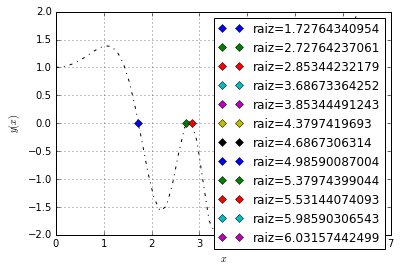

In [6]:
x=linspace(0,2*pi)
plot(x,y(x),color='k',linestyle='-.')
plot([1.72764340954],[0],'D',label='raiz=1.72764340954')
plot([2.72764237061],[0],'D',label='raiz=2.72764237061')
plot([2.85344232179],[0],'D',label='raiz=2.85344232179')
plot([3.68673364252],[0],'D',label='raiz=3.68673364252')
plot([3.85344491243],[0],'D',label='raiz=3.85344491243')
plot([4.3797419693],[0],'D',label='raiz=4.3797419693')
plot([4.6867306314],[0],'D',label='raiz=4.6867306314')
plot([4.98590087004],[0],'D',label='raiz=4.98590087004')
plot([5.37974399044],[0],'D',label='raiz=5.37974399044')
plot([5.53144074093],[0],'D',label='raiz=5.53144074093')
plot([5.98590306543],[0],'D',label='raiz=5.98590306543')
plot([6.03157442499],[0],'D',label='raiz=6.03157442499')
xlabel('$x$')
ylabel('$y(x)$')
grid(True)
legend()
show()

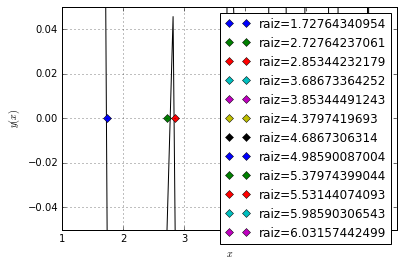

In [7]:
plot(x,y(x),color='k')
plot([1.72764340954],[0],'D',label='raiz=1.72764340954')
plot([2.72764237061],[0],'D',label='raiz=2.72764237061')
plot([2.85344232179],[0],'D',label='raiz=2.85344232179')
plot([3.68673364252],[0],'D',label='raiz=3.68673364252')
plot([3.85344491243],[0],'D',label='raiz=3.85344491243')
plot([4.3797419693],[0],'D',label='raiz=4.3797419693')
plot([4.6867306314],[0],'D',label='raiz=4.6867306314')
plot([4.98590087004],[0],'D',label='raiz=4.98590087004')
plot([5.37974399044],[0],'D',label='raiz=5.37974399044')
plot([5.53144074093],[0],'D',label='raiz=5.53144074093')
plot([5.98590306543],[0],'D',label='raiz=5.98590306543')
plot([6.03157442499],[0],'D',label='raiz=6.03157442499')
xlim([1,6.5]),ylim([-.05,.05])
xlabel('$x$')
ylabel('$y(x)$')
grid(True)
legend()
show()

### 2.-
Se tiene la siguiente función:

$$f(x,y)=2e^{-(x+1)^2}\left(e^{-(y+2)^2} + e^{-(y-2)^2}\right) + 6x(x^2 + y^2)e^{-(x^2+y^2)} -1$$

Encuentre los puntos ($\hat{x},\hat{y}$) tales que $f(\hat{x},\hat{y}) = 0$ y dibuje estos puntos en el plano $xy$.

In [8]:
def f(x): #x=(x[0]=x,x[1]=y)
    return (2*exp(-(x[0]+1)**2))*(exp(-(x[1]+2)**2)+exp(-(x[1]-2)**2))+6*x[0]*(x[0]**2+x[1]**2)*exp(-(x[0]**2+x[1]**2))-1

In [9]:
def raiz_f(func,x_i,x_d,err=1e-5):
    x_i,x_d=array(x_i),array(x_d)
    raiz=0.5*(x_i+x_d)
    func_i,func_d=func(x_i),func(x_d)
    while abs(func_i-func_d)>=err:
        p_m=func(raiz)
        if p_m==0:
            break
        if func_i*p_m<0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        func_i,func_d=func(x_i),func(x_d)
    return array(raiz)

In [10]:
def raiz_vec(func,xy_id,err=1e-3):
    x=arange(xy_id[0],xy_id[1]+err,err)
    y=arange(xy_id[2],xy_id[3]+err,err)
    x_raiz=[]
    y_raiz=[]
    for n in xrange(len(x)-1):
        for m in xrange(len(y)-1):
            x_i=[x[m],y[n]]
            x_d=[x[m],y[n+1]]
            func_i,func_d=func(x_i),func(x_d)
            if func_i*func_d<=0:
                raiz=raiz_f(func,x_i,x_d)
                x_raiz.append(raiz[0])
                y_raiz.append(raiz[1])
    return array([x_raiz,y_raiz])

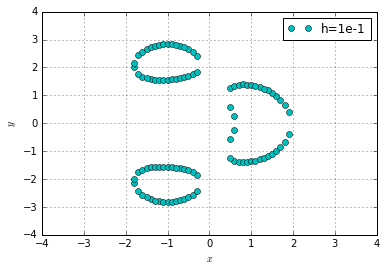

In [11]:
xlim([-4,4]), ylim([-4,4])
x_raiz1,y_raiz1=raiz_vec(f,[-4,4,-4,4],1e-1)
plot(x_raiz1,y_raiz1,'o',color='c',label='h=1e-1')
grid(True)
xlabel('$x$')
ylabel('$y$')
legend()
show()

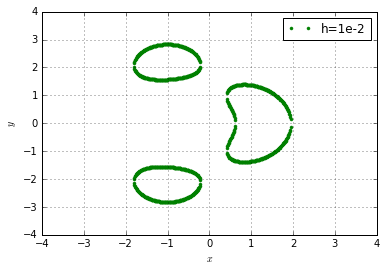

In [12]:
xlim([-4,4]), ylim([-4,4])
x_raiz,y_raiz=raiz_vec(f,[-4,4,-4,4],1e-2)
plot(x_raiz,y_raiz,'.',color='g',label='h=1e-2')
grid(True)
xlabel('$x$')
ylabel('$y$')
legend()
show()

### 3.-
Se tiene una pelota de masa $m$ sobre un plano inclinado a un ángulo $\alpha = 15º, 30º y 45º$.

### (a) 
Dibuje la trayectoria de la pelota si es lanzada desde el plano inclinado con una velocidad $v_{0x},v_{0y}>0$ considerando que hay fricción con el aire proporcional a la velocidad.

### (b)
Realice la misma simulación si ahora la fricción es proporcional al cuadrado de la velocidad.

### (c) 
¿Qué sucede si ahora la pelota es lanzada con velocidad inicial $v_{0x}<0$ tal que $tan^{−1} \left(􏰀\frac{v_{0y}}{v_{0x}}\right) >\alpha$.

Realice las gráficas que representen las simulaciones. Puede suponer que $m = 1$ y valores adecuados para los coeficientes de fricción.


In [13]:
def rk4(ec,p_ini,x,args=0,h=0.01): #Runge Kutta de cuarto orden
    if (x[1]-x[0])<=5*h:
        h=(x[1]-x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i])
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        #evaluando en el i-esimo
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i],args)
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [14]:
def rotacion(theta):
    theta=theta*pi/180.
    return array([cos(theta),-sin(theta),0,0]),array([sin(theta),cos(theta),0,0]),array([0,0,cos(theta),-sin(theta)]),array([0,0,sin(theta),cos(theta)])

In [15]:
def ec_mov(r_v,t,fric=0,g=9.8,m=1): #ecuaciones de movimiento
    dx=r_v[2]  #velocidad en r_v=(x,y,vx,vy)=(0,1,2,3) r=(pos),v=(vel)
    dy=r_v[3]
    if fric==0:
        dvx,dvy=0,-(g/m)
        #print "No use modelo de fricción"
    else:
        dvx=-(fric([r_v[2],r_v[3]]))[0]
        dvy=-(g/m)-(fric([r_v[2],r_v[3]]))[1]
        #print "Use modelo de fricción"
    return dot(rotacion(theta),array([dx,dy,dvx,dvy]))

In [16]:
def pl_inc(x,alfa):
    return -tan(alfa*pi/180)*x

In [17]:
#Modelos de friccion
def fric_v(v,gamma=0.1):
    f_x=gamma*v[0]
    f_y=gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v=sqrt(v[0]**2+v[1]**2)
    f_x=gamma*norm_v*v[0]
    f_y=gamma*norm_v*v[1]
    return array([f_x,f_y])
    

In [18]:
def rebote(r_v_i,mi_dt,fric=0): #r_v_i es trayectori[i,:]
    dt_busqueda=mi_dt/2
    y_izq=r_v_i #obtenido de la trayectoria inicial
    t,sol=rk4(ec_mov,r_v_i,[0,dt_busqueda],fric) #cuatro puntos de la coordenada de la derecha
    y_med=sol[-1,:]#resultado de haber integrado a la mitad, ultimo punto se queda
    while abs(y_izq[1])>1e-5: #mayor a error
        if y_izq[1]*y_med[1]<0:
            reinicio=y_izq #integra desde el mismo punto
        else:
            reinicio=y_med 
        dt_busqueda=dt_busqueda/2 #reduce tiempo de integracion
        t,sol=rk4(ec_mov,reinicio,[0,dt_busqueda],fric)
        y_izq=reinicio
        y_med=sol[-1,:]
    y_izq=array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

In [19]:
def trayectorias(c_i,theta,fric=0,N=50,h=0.1):
    inicio=c_i #punto inicial para determinar raices
    #N=50 # 500 puntos de la trayectoria
    trayectoria=zeros((N,len(inicio)))
    trayectoria[0,:]=array(inicio)
    mi_dt= h #intervalo de tiempo donde se guardara los datos obtenidos, es decir memoria, se integra de 0 a dt
    for i in range(N-1): #punto d einicio
        t,sol_dt=rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fric) # punto de integracion originalmente
        if sol_dt[-1,:][1]<0: #[1] primera entrada
            punto=rebote(trayectoria[i,:],mi_dt)
            trayectoria[i+1,:]=punto
        else:
            trayectoria[i+1,:]=sol_dt[-1,:] #trayectoria[1,:]=array([1,2,3,4]) se llena la fila numero uno con datos dados, ultimo punto de la simulacion
    for i in range(N):
        trayectoria[i,:]=dot(rotacion(-theta),trayectoria[i,:])
    return trayectoria

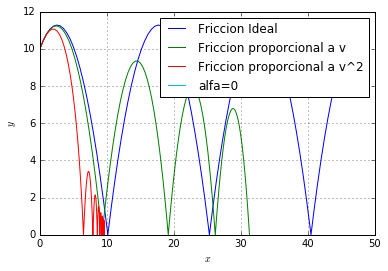

In [20]:
theta=0
modelos_fric=[0,fric_v,fric_v2]
frics=['Friccion Ideal','Friccion proporcional a v','Friccion proporcional a v^2']
for i in xrange(len(modelos_fric)):
    trayec=trayectorias([0,10,5,5],theta,modelos_fric[i],100)
    plot(trayec[:,0],trayec[:,1],label=str(frics[i]))
plot(trayec[:,0],pl_inc(trayec[:,0],theta),label='alfa=0')
xlabel('$x$')
ylabel('$y$')
legend()
grid(True)
show()

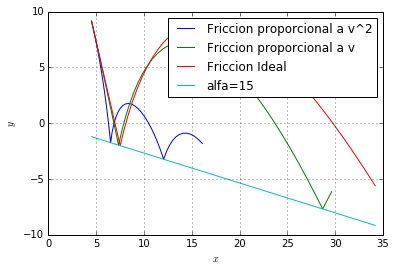

In [21]:
theta=15
modelos_fric=[0,fric_v,fric_v2]
frics=['Friccion Ideal','Friccion proporcional a v','Friccion proporcional a v^2']
for i in xrange(len(modelos_fric)):
    trayec=trayectorias([2,10,0,0],theta,modelos_fric[2-i],50)
    plot(trayec[:,0],trayec[:,1],label=str(frics[2-i]))
plot(trayec[:,0],pl_inc(trayec[:,0],theta),label='alfa=15')
xlabel('$x$')
ylabel('$y$')
legend()
grid(True)
show()

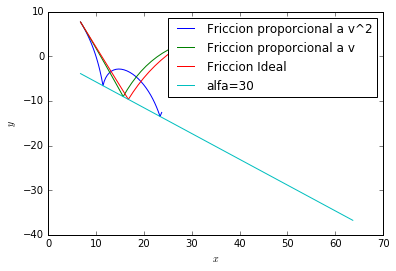

In [22]:
theta=30
modelos_fric=[0,fric_v,fric_v2]
frics=['Friccion Ideal','Friccion proporcional a v','Friccion proporcional a v^2']
for i in xrange(len(modelos_fric)):
    trayec=trayectorias([2,10,0,0],theta,modelos_fric[2-i],50)
    plot(trayec[:,0],trayec[:,1],label=str(frics[2-i]))
plot(trayec[:,0],pl_inc(trayec[:,0],theta),label='alfa=30')
xlabel('$x$')
ylabel('$y$')
legend()
show()

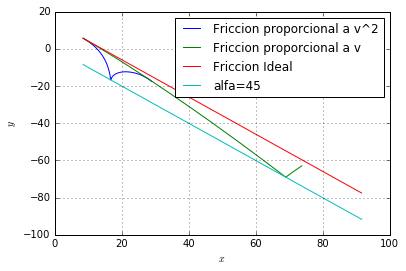

In [23]:
theta=45
modelos_fric=[0,fric_v,fric_v2]
frics=['Friccion Ideal','Friccion proporcional a v','Friccion proporcional a v^2']
for i in xrange(len(modelos_fric)):
    trayec=trayectorias([2,10,0,0],theta,modelos_fric[2-i],50)
    plot(trayec[:,0],trayec[:,1],label=str(frics[2-i]))
plot(trayec[:,0],pl_inc(trayec[:,0],theta),label='alfa=45')
xlabel('$x$')
ylabel('$y$')
legend()
grid(True)
show()

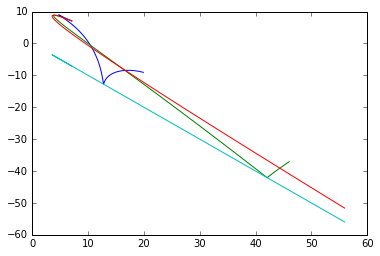

In [24]:
v0x,v0y=[-7,5]
theta<(tan(v0y/v0x)**-1)
modelos_fric=[0,fric_v,fric_v2]
for i in xrange(len(modelos_fric)):
    trayec=trayectorias([0,10,v0x,v0y],theta,modelos_fric[2-i],50)
    plot(trayec[:,0],trayec[:,1])
plot(trayec[:,0],pl_inc(trayec[:,0],theta))
show()